# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [3]:
import numpy
import main
print(main.spare_matrix_Abt(3,2))

(array([[1. , 0. ],
       [1. , 0.5],
       [1. , 1. ]]), array([1.        , 0.87758256, 0.54030231]))


---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [4]:

import numpy as np
import time
import tracemalloc

m,n=50,12
A,b =  main.spare_matrix_Abt(m,n)


A_new,b_new = main.square_from_rectan(A,b)
norm = [0]*4
czas = [0]*4
memory = [0]*4






##
tracemalloc.start()
t0 = time.perf_counter()
x_ne = np.linalg.solve(A_new, b_new)
t1 = time.perf_counter()
_, peak = tracemalloc.get_traced_memory(); tracemalloc.stop()

norm[0] = np.linalg.norm(A @ x_ne - b)
czas[0] = t1 - t0
memory[0] = peak / (1024**2)


##
tracemalloc.start()
t0 = time.perf_counter()
x_ls, *_ = np.linalg.lstsq(A, b, rcond=None)
t1 = time.perf_counter()
_, peak = tracemalloc.get_traced_memory(); tracemalloc.stop()

norm[1] = np.linalg.norm(A @ x_ls - b)
czas[1] = t1 - t0
memory[1] = peak / (1024**2)

##
tracemalloc.start()
t0 = time.perf_counter()
Q, R = np.linalg.qr(A, mode="reduced")
y = Q.T @ b
x_qr = np.zeros(n)
for i in range(n-1, -1, -1):
    x_qr[i] = (y[i] - np.dot(R[i, i+1:], x_qr[i+1:])) / R[i, i]
t1 = time.perf_counter()
_, peak = tracemalloc.get_traced_memory(); tracemalloc.stop()

norm[2] = np.linalg.norm(A @ x_qr - b)
czas[2] = t1 - t0
memory[2] = peak / (1024**2)

##
tracemalloc.start()
t0 = time.perf_counter()
U, s, VT = np.linalg.svd(A, full_matrices=False)
c = U.T @ b
w = c / s
x_svd = VT.T @ w
t1 = time.perf_counter()
_, peak = tracemalloc.get_traced_memory(); tracemalloc.stop()

norm[3] = np.linalg.norm(A @ x_svd - b)
czas[3] = t1 - t0
memory[3] = peak / (1024**2)

print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(czas[0])[:29]}")
print(f"Druga metoda    :  {str(czas[1])[:29]}")
print(f"Trzecia metoda  :  {str(czas[2])[:29]}")
print(f"Czwarta metoda  :  {str(czas[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  1.638e-08
Druga metoda    :  4.219e-15
Trzecia metoda  :  2.017e-15
Czwarta metoda  :  5.299e-15

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  0.0005458999949041754
Druga metoda    :  0.004217000008793548
Trzecia metoda  :  0.002498300003935583
Czwarta metoda  :  0.001545899998745881

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  0.01886272430419922
Druga metoda    :  0.01935291290283203
Trzecia metoda  :  0.03149223327636719
Czwarta metoda  :  0.025371551513671875


In [5]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  1.638e-08
Druga metoda    :  4.219e-15
Trzecia metoda  :  2.017e-15
Czwarta metoda  :  5.299e-15

Czas wykonywania dla kolejnych metod obliczeń:


TypeError: 'module' object is not subscriptable

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [ ]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

In [ ]:
# ===== Twoja implementacja tutaj =====
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

średniaw= np.mean(w)
średniad= np.mean(d)

beta = np.sum((d -średniad)*(w - średniaw))/np.sum((d - średniad)**2)
alpha = średniaw -beta*średniad

y=alpha + beta * d
różnica = w - y 


print(f"Równanie regresji: w = {alpha:.3f} + {beta:.3f} * d\n")


for i in range(len(d)):
    print(f"{d[i]:>3}\t{w[i]:>6.1f}\t{y[i]:>8.2f}\t{różnica[i]:>8.2f}")

# --- Średni błąd ---
sredni_blad = np.mean(np.abs(różnica))
print("\nŚredni błąd bezwzględny:",sredni_blad)



## Istnieje możliwość lepszego dopasowania w przypadku modelu kwadratowego


Równanie regresji: w = -3.504 + 0.786 * d

210	 140.0	  161.58	  -21.58
270	 190.0	  208.74	  -18.74
290	 250.0	  224.47	   25.53
310	 270.0	  240.19	   29.81
370	 290.0	  287.35	    2.65
400	 310.0	  310.94	   -0.94
450	 340.0	  350.24	  -10.24
480	 360.0	  373.82	  -13.82
510	 420.0	  397.41	   22.59
520	 390.0	  405.27	  -15.27

Średni błąd bezwzględny: 16.11766927944094


---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

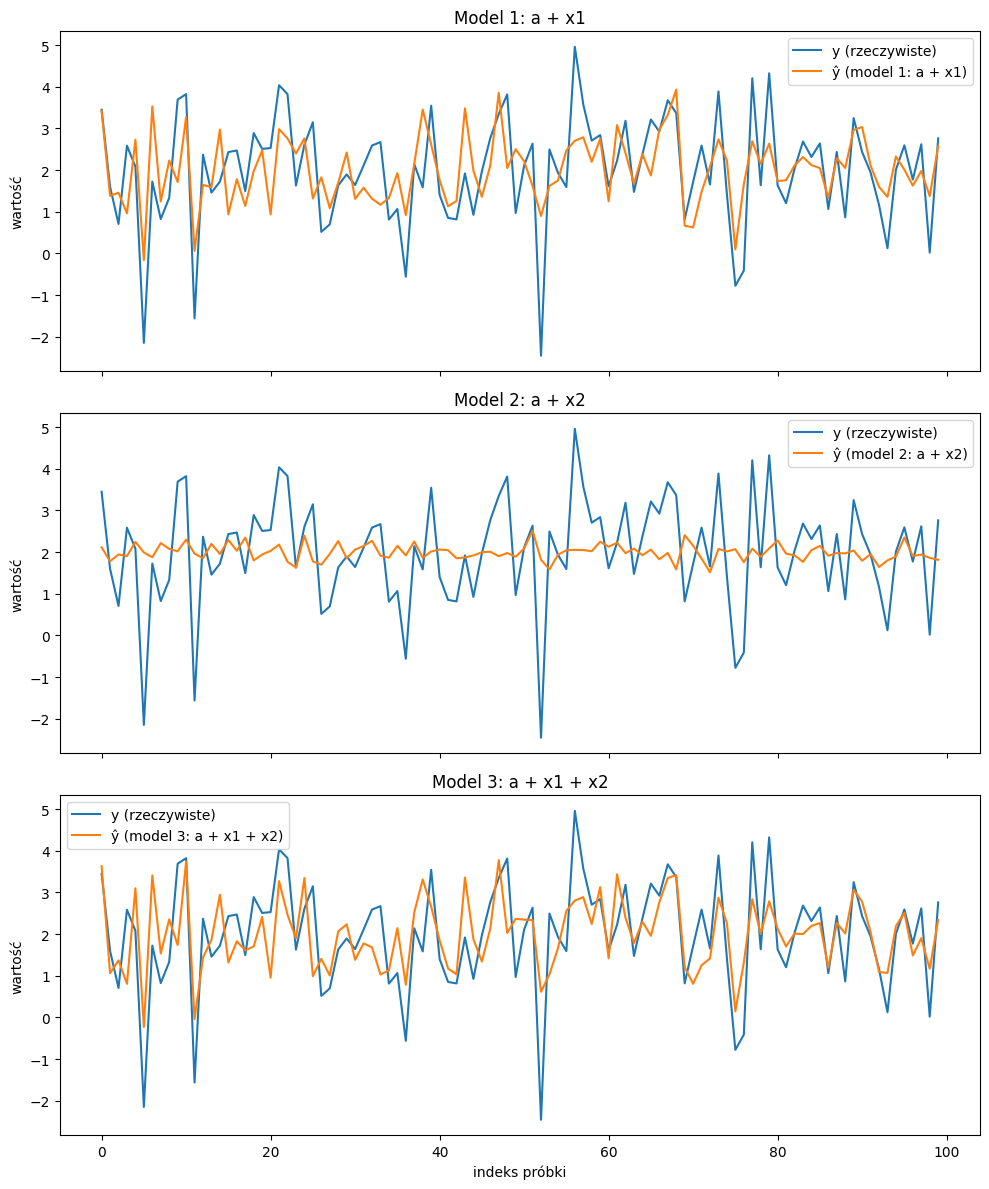

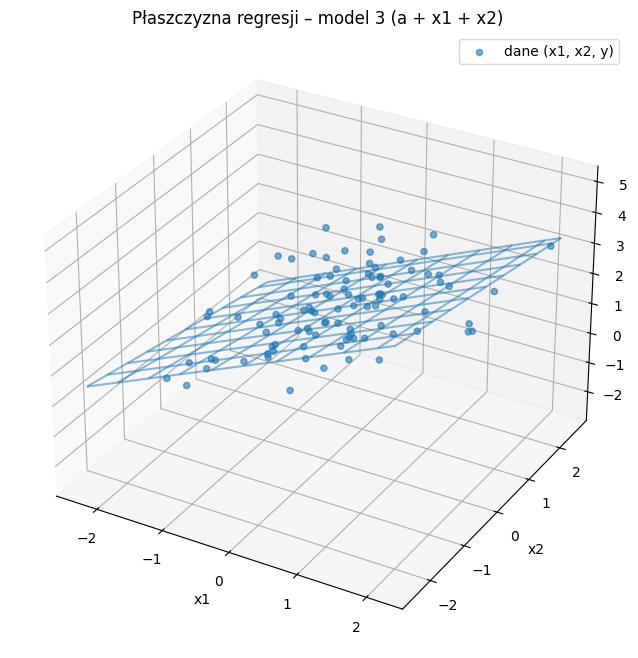

In [7]:
# ===== Twoja implementacja tutaj =====
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
n= 100 
x1 = np.random.normal(0,1, size=(n, 1))
x2 = np.random.normal(0,1, size=(n, 1))
e =np.random.normal(0,1, size=(n, 1))
y = 2+x1-0.5 * x2+ e

def rozklad(Z,y):

    Q,R = np.linalg.qr(Z)      
    Qt_y= Q.T@y                 
    b =np.linalg.solve(R, Qt_y)    
    return b

x1x2 = x1*x2
ones = np.ones((n, 1))
Z1 = np.concatenate([ones, x1],axis=1) 
Z2 = np.concatenate([ones, x2],axis=1) 
Z3 = np.concatenate([ones, x1, x2],axis=1)   

Z4 = np.concatenate([ones,x1,x2,x1x2],axis=1)


b1 = rozklad(Z1,y)
b2 = rozklad(Z2,y)
b3 = rozklad(Z3,y)
b4 = rozklad(Z4,y)


y1 = Z1 @ b1
y2 = Z2 @ b2
y3 = Z3 @ b3
y4 = Z4 @ b4

fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

idx = np.arange(n)



axes[0].plot(idx, y, label='y (rzeczywiste)')
axes[0].plot(idx, y1, label='ŷ (model 1: a + x1)')
axes[0].set_ylabel('wartość')
axes[0].legend()
axes[0].set_title('Model 1: a + x1')


axes[1].plot(idx, y, label='y (rzeczywiste)')
axes[1].plot(idx, y2, label='ŷ (model 2: a + x2)')
axes[1].set_ylabel('wartość')
axes[1].legend()
axes[1].set_title('Model 2: a + x2')


axes[2].plot(idx, y, label='y (rzeczywiste)')
axes[2].plot(idx, y3, label='ŷ (model 3: a + x1 + x2)')
axes[2].set_xlabel('indeks próbki')
axes[2].set_ylabel('wartość')
axes[2].legend()
axes[2].set_title('Model 3: a + x1 + x2')

plt.tight_layout()
plt.show()



x1_grid = np.linspace(np.min(x1), np.max(x1), 20)
x2_grid = np.linspace(np.min(x2), np.max(x2), 20)
X1g, X2g = np.meshgrid(x1_grid, x2_grid)

b0, b1_, b2_ = b3.flatten()
Yg = b0 + b1_ * X1g + b2_ * X2g

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, label='dane (x1, x2, y)', alpha=0.6)


ax.plot_wireframe(X1g, X2g, Yg, rstride=2, cstride=2, alpha=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y / ŷ')
ax.set_title('Płaszczyzna regresji – model 3 (a + x1 + x2)')
plt.legend()
plt.show()

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)